In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from src import utils

# Airbnb Analysis with rio de janeiro dataset

## Section 1: Business Understanding

Airbnb is an online rental business company. Their services are based in its plataform
to match people interest to host their places
entire of partially for other people. 
Airbnb became very popular in Brasil in last years. 
Therefore, I was curious for investigating what data has to tell about the business.

Furthermore, COVID-19 Quarantine started in Brazil in 24 march of 2020,
and hits hardly the economy in general. I am interested to measure the size of this impact.


## Questions
<ol>
 <li>Which neighbourhoods are most frequented?</li>
 <li>What influences the price of rental price?</li>
 <li> What about economy due to COVID-19 quarantine? 
</li>
</ol>

Obs. 1: All analysis are focused in rio de janeiro. 
    
Obs. 2: In databases it is not possible differentiate when a place is rented or the host is not interested to rent in that period. So, a way found to get insights about rentend places is using reviwes.  
This idea was suggested in data documentation: http://insideairbnb.com/about.html#disclaimers. 

## Section 2: Data Understanding

### Load Datasets

- Listings

In [2]:
# List of places registered in Airbnb Rio
listings = pd.read_csv('data/raw/listings.csv')

After previews analysis in dataset by column description, the following columns were chosen:

In [3]:
# ID place columns
id_cols = ['id']

# Numerical columns
num_cols = [
    'host_since', 'host_response_rate', 'host_acceptance_rate', 'accommodates',
    'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_30',
    'availability_60', 'availability_90', 'availability_365', 'number_of_reviews',
    'last_review', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month', 'price'
    ]

# Categorical columns
cat_cols = [
    'host_response_time', 'host_is_superhost', 'host_identity_verified',
    'neighbourhood_cleansed', 'room_type', 'amenities', 'instant_bookable'
    ]

listings_cols = id_cols + num_cols + cat_cols
print('The number of columns selected from listings was: {}'.format(len(listings_cols)))

The number of columns selected from listings was: 31


In [4]:
# Filter selected columns
listings = listings[listings_cols].copy()

In [5]:
# Describe dtypes and nulls for listings
utils.describe_df(listings)

,col,type,count_nulls,ratio_nulls
0,id,int64,0,0.00
1,host_since,object,8,0.00
2,host_response_rate,object,7744,0.32
3,host_acceptance_rate,object,6420,0.27
4,accommodates,int64,0,0.00
5,bedrooms,float64,1530,0.06
6,beds,float64,240,0.01
7,minimum_nights,int64,0,0.00
8,maximum_nights,int64,0,0.00
9,availability_30,int64,0,0.00


#### Columns description:
- **id**: place id 
- **host_since**: host is in airbnb since
- **host_response_rate**: host response rate
- **host_acceptance_rate**: host acceptance rate
- **accommodates**: how many peoples this place accomodates
- **bedrooms**: number of bedrooms
- **beds**: number of beds
- **minimum_nights**: minimum nights which is necessary to rent
- **maximum_nights**: maximun nights which is necessary to rent
- **availability_30**: place availability for next 30 days
- **availability_60**: place availability for next 60 days
- **availability_90**: place availability for next 90 days
- **availability_365**: place availability for next 365 days
- **number_of_reviews**: number of reviews of this place
- **last_review**: when happens last review
- **review_scores_rating**: mean review scores
- **review_scores_accuracy**: mean review scores for accuracy
- **review_scores_cleanliness**: mean review scores for accuracy cleanliness
- **review_scores_checkin**: mean review scores for checkin
- **review_scores_communication**: mean review scores for communication
- **review_scores_location**: mean review scores for location
- **review_scores_value**: mean review scores for value
- **reviews_per_month**: number of reviews per month
- **price**: price of one night
- **host_response_time**: categorical description of an interval that host delays to response
- **host_is_superhost**: flag if host is a superhost
- **host_identity_verified**: flag if host was verified
- **neighbourhood_cleansed**: neighbourhood name
- **room_type**: description if the place is rented entirely or partially
- **amenities**: which amenities the place has
- **instant_bookable**: flag if place is instant_bookable

- Reviews

In [6]:
# Reviews registered
reviews = pd.read_csv('data/raw/reviews.csv')

In [7]:
# Describe dtypes and nulls for reviews
utils.describe_df(reviews)

,col,type,count_nulls,ratio_nulls
0,listing_id,int64,0,0.0
1,id,int64,0,0.0
2,date,object,0,0.0
3,reviewer_id,int64,0,0.0
4,reviewer_name,object,0,0.0
5,comments,object,81,0.0


#### Columns description:

- **listing_id**: place id of review
- **id**: review id
- **date**: date of review
- **reviewer_id**: id of reviewer
- **reviewer_name**: name of reviewer
- **comments**: comments of reviewer

- neighbourhoods

In [8]:
# Info geospatial about Rio neighbourhoods
df_places = gpd.read_file('data/raw/neighbourhoods.geojson')

In [9]:
# Describe dtypes and nulls for neighbourhoods
utils.describe_df(df_places)

,col,type,count_nulls,ratio_nulls
0,neighbourhood,object,0,0.0
1,neighbourhood_group,object,160,1.0
2,geometry,geometry,0,0.0


#### Columns description:

- **neighbourhood**: neighbourhood name  
- **neighbourhood_group**: all nulls, this column was not considered 
- **geometry**: polygon geometry for each neighbourhood

## Section 3: Prepare Data

#### Q1 - Prep

In [10]:
# Filter only places reviewed in last 6 months to avoid places which are inative.
listings_filtered = utils.calc_delta_day(listings, 'last_review', '2020-10-25')
listings_filtered = listings_filtered[listings_filtered.delta_last_review <= 180]

# Filter only reviews in last 6 month
count_revs = reviews[reviews.date >= '2020-04-25'].copy()

In [11]:
# Count number of reviews per id place in last 6 months
count_revs = count_revs.groupby('listing_id')['date'].count()
count_revs = count_revs.reset_index()
count_revs.columns = ['id', 'count_reviews']

# Merge count reviews with neighbourhood dateset
neighbourhood = listings[['id', 'neighbourhood_cleansed']].copy()
df_neighbourhood = neighbourhood.merge(count_revs, how='inner', on='id')

# Calculate number of reviews per neighbourhood
count_neighbourhood = df_neighbourhood.groupby('neighbourhood_cleansed')['count_reviews'].sum()
count_neighbourhood = count_neighbourhood.sort_values(ascending=False)

# Calculate total number of reviews for last 6 months
total_reviews = df_neighbourhood['count_reviews'].sum()

# Calculate in percentage the top 5 neighbourhoods most reviewed.
top_neighbourhood_df = (count_neighbourhood/total_reviews).head()

#### Q2 - Prep

It is necessary clean dataset and prepare features to train a linear regression model to check feature importance.

##### Drop outliers

In [12]:
# Drop values with thousands separator problems in price columns
listings_filtered = listings_filtered[listings_filtered.price.apply(lambda x: len(x)) != 10]

In [13]:
# Drop NANs listings reviews with null values in specific evaluation scores and not null in general score.
listings_filtered  = listings_filtered [~listings_filtered.review_scores_accuracy.isnull()]
listings_filtered .reset_index(drop=True, inplace=True)

##### Numerical features prep

In [14]:
# Dataframe with only numerical columns
df_num = listings_filtered[num_cols].copy()

In [15]:
# Prep in numerical columns
df_num = utils.calc_delta_day(df_num, 'host_since', '2020-10-25', True)
df_num = utils.calc_delta_day(df_num, 'last_review', '2020-10-25', True)
df_num = utils.cast_to_float(df_num, 'host_response_rate', ['\%'])
df_num = utils.cast_to_float(df_num, 'host_acceptance_rate', ['\%'])
df_num = utils.cast_to_float(df_num, 'price', ['\$', ','])

##### Solve Nan values

Analysing Nan values for bedrooms and beds columns:

    Picking some examples in listing_url col and look into website is possible to conclude that these places really do not have bedrooms. They can be studios or in extreme cases, when they accommodate 16 people, they are rental places only to make a celebration. This resoning can be expanded to Nan values in bed columns. Therefore, they were filled with 0.

In [16]:
fill_zero = ['bedrooms', 'beds']
df_num.loc[:, fill_zero] = df_num[fill_zero].fillna(0)

Analysing Nan values for host_response_rate and host_acceptance_rate columns:

    For host_response_rate and host_acceptance_rate is a bit strange they are not full filled. It looks like lost of information. To not affect so much the model, the solution for these cases was fill with mean.

In [17]:
fill_mean = ['host_response_rate', 'host_acceptance_rate']
df_num.loc[:, fill_mean] = df_num[fill_mean].fillna(df_num[fill_mean].mean())

##### Categorical features prep

In [18]:
df_cat = listings_filtered[cat_cols].copy()

In [19]:
df_cat = utils.cast_bool(df_cat, 'host_is_superhost')
df_cat = utils.cast_bool(df_cat, 'host_identity_verified')
df_cat = utils.cast_bool(df_cat,'instant_bookable')
df_cat = utils.create_flag_entire_home(df_cat, 'room_type', True)
df_cat = utils.create_dummies(df_cat, 'host_response_time')
df_cat = utils.create_dummies(df_cat, 'neighbourhood_cleansed')
df_cat, mlb = utils.processes_mlb(df_cat, 'amenities', True)

##### Merge numerical and categorical features

In [20]:
# Putting together num and cat columns
features_df = df_num.join(df_cat)

#### Q3 - Prep

Prepare number of reviews in different year to compare over the time.

In [21]:
revs = reviews[['id', 'date']].copy()

# Filter always same period in each year. In 2020 data, it is only available data up to 25th oct.
reviews_2020 = revs[reviews.date >= '2020-01-01'].copy()
reviews_2019 = revs[(reviews.date >= '2019-01-01') & (reviews.date <= '2019-10-25')]
reviews_2018 = revs[(reviews.date >= '2018-01-01') & (reviews.date <= '2018-10-25')]
reviews_2017 = revs[(reviews.date >= '2017-01-01') & (reviews.date <= '2017-10-25')]
reviews_2016 = revs[(reviews.date >= '2016-01-01') & (reviews.date <= '2016-10-25')]

# Create month column
reviews_2020 = utils.create_month(reviews_2020, 'date')
reviews_2019 = utils.create_month(reviews_2019, 'date')
reviews_2018 = utils.create_month(reviews_2018, 'date')
reviews_2017 = utils.create_month(reviews_2017, 'date')
reviews_2016 = utils.create_month(reviews_2016, 'date')

# Count number of reviews per month and year
count_reviews_2020 = utils.count_column(reviews_2020, 'month', 'year', 2020)
count_reviews_2019 = utils.count_column(reviews_2019, 'month', 'year', 2019)
count_reviews_2018 = utils.count_column(reviews_2018, 'month', 'year', 2018)
count_reviews_2017 = utils.count_column(reviews_2017, 'month', 'year', 2017)
count_reviews_2016 = utils.count_column(reviews_2016, 'month', 'year', 2016)

# Putting all together
count_concat = pd.concat([count_reviews_2020,
                          count_reviews_2019,
                          count_reviews_2018,
                          count_reviews_2017,
                          count_reviews_2016])

## Section 4: Data Modeling

To answer question 2, it was trained a linear regression with price as target.

In [22]:
# Split features and target
X = features_df.drop('price', axis=1)
y = features_df.price

### Feature Selection and final model

In [23]:
# For feature selection, cuts is a list with different thresholds to vary
# minimun percentage of positive class occurence in each column.
cuts = list(np.array(range(500, 1, -1))/500)

Select_features function return metrics for different models varying number of features used.  
It also returns the best model for validation set. All tests are using 30% of data for test set and random seed equals 42.

In [24]:
mae_trains, mae_tests, num_feats, best_model, reduce_x = utils.select_features(X, y, cuts)

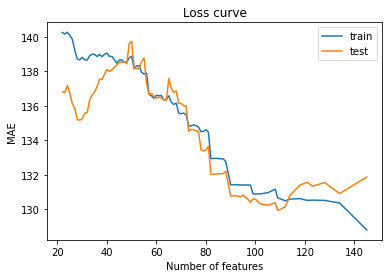

In [25]:
plt.plot(num_feats, mae_trains, label='train')
plt.plot(num_feats, mae_tests.values(), label='test')
plt.title('Loss curve')
plt.xlabel('Number of features')
plt.ylabel('MAE')
plt.legend()

The smallest MAE test is using 109 features.  
These features have more than 2.2% of positive class occurrence.

## Section 5: Evaluation

###  Question 1: Which neighbourhoods are most frequented?

In [26]:
top_neighbourhood_df.head()

neighbourhood_cleansed
Copacabana                  0.322579
Barra da Tijuca             0.136690
Ipanema                     0.106148
Leblon                      0.060738
Recreio dos Bandeirantes    0.057696
Name: count_reviews, dtype: float64

Text(0, 0.5, 'Ratio of all reviews')

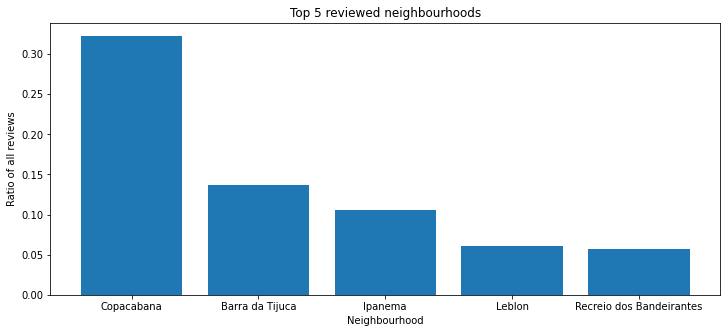

In [27]:
plt.rcParams["figure.figsize"] = (12,5)
plt.bar(top_neighbourhood_df.reset_index()['neighbourhood_cleansed'].values, top_neighbourhood_df.reset_index().count_reviews.values)
plt.title('Top 5 reviewed neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Ratio of all reviews')

Famous neighbourhoods are in top 5 reviews such as Copacabana, Ipanema and Leblon.

- Places available in the list

In [28]:
# These are top 5 neighbourhood in percentage with places subscribed in Airbnb listings.
result_2 = df_neighbourhood['neighbourhood_cleansed'].value_counts(normalize=True).head()
result_2.reset_index()

,index,neighbourhood_cleansed
0,Copacabana,0.332970
1,Barra da Tijuca,0.130312
2,Ipanema,0.122685
3,Leblon,0.061669
4,Recreio dos Bandeirantes,0.045108


The reason of these neighbourhoods are most reviewed, and indirectly visited, it is because there are more places announced
there too.

- Plot map

In [29]:
# Create a flag for top 5 neighbourhoods
df_places.loc[df_places.neighbourhood.isin(list(top_neighbourhood_df.index)), 'top_neighbourhood'] = 1
df_places.top_neighbourhood.fillna(0, inplace=True)

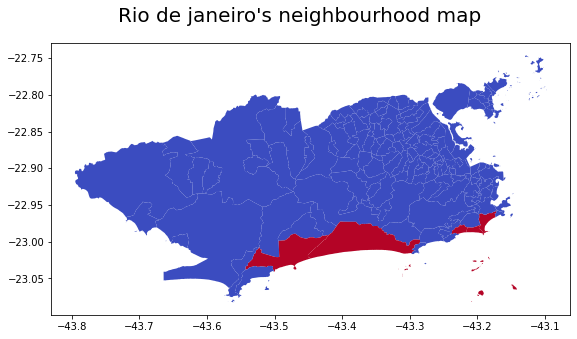

In [30]:
plot = df_places.plot(column='top_neighbourhood', cmap='coolwarm')
fig = plot.get_figure()
fig.suptitle(r"Rio de janeiro's neighbourhood map", fontsize=20)
fig.savefig('figures/neighbourhood_map.png', dpi=600, transparent=False)

It is a geospatial representation of Rio de janeiro, where the red area is composed by top 5 reviewed neighbourhoods.  
They are concentrated in two major areas, both are beach places.

###  Question 2: Which elements influence the price?

Firstly, let's check correlation between price and numerical features

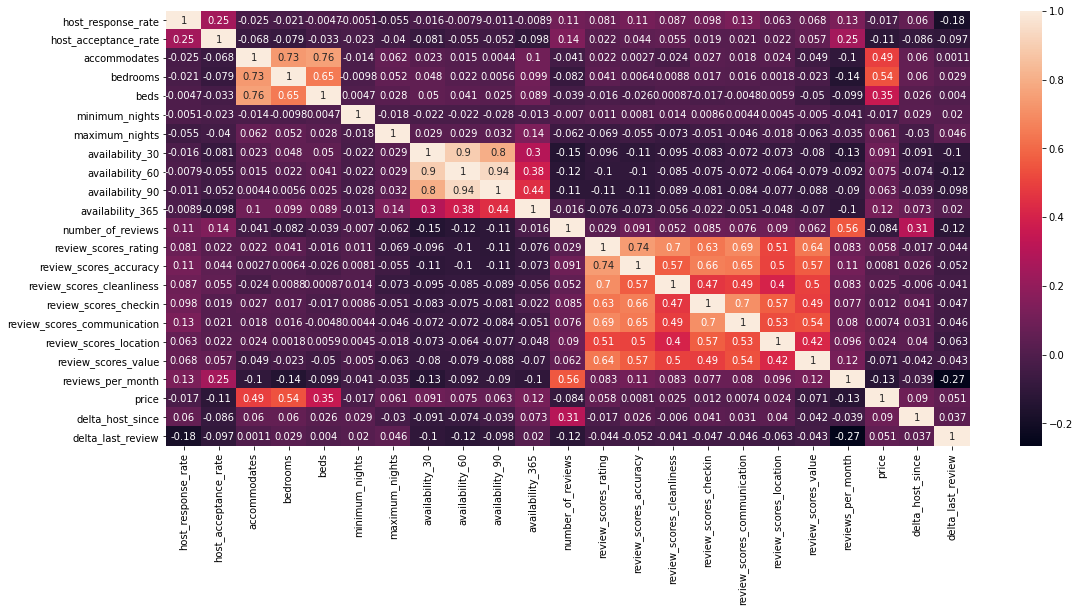

In [31]:
# Calculate correlation between numerical columns in a heatmap
fig, ax = plt.subplots(figsize=(18, 8))
fig = sns.heatmap(ax=ax, data=df_num.corr(), annot=True)

Number of people which the places accomodates, bedrooms and beds are strong correlationed with price.

Now, let's check feature importance of a well fitted linear regression to predict price

In [32]:
cols = list(reduce_x.columns)
feature_importance = pd.DataFrame(best_model.coef_, index=list(reduce_x.columns))
feature_importance.columns = ['feature_importance']

# Top 10 positive importance features
feature_importance.sort_values(by='feature_importance', ascending=False).head(10)

,feature_importance
amenities_Pool,175.007646
amenities_Dishwasher,159.383225
amenities_Bathtub,135.294671
neighbourhood_cleansed_Leblon,116.521688
bedrooms,115.617628
neighbourhood_cleansed_Ipanema,103.204649
amenities_Dryer,65.067311
amenities_Hot tub,64.954320
neighbourhood_cleansed_Copacabana,62.599226
flag_entire_home,56.189341


#### Features with high positive impact in price: 
- Location in Copacabana, Leblon or Ipanema;
- Presence of luxury items like pool, dish washer or bathtub;
- Number of bedrooms as an indicative of size of real state.

In [33]:
# Top 5 negative importance features
feature_importance.sort_values(by='feature_importance').head()

,feature_importance
amenities_Gym,-110.882995
neighbourhood_cleansed_Jacarepaguá,-74.758062
amenities_Children’s books and toys,-49.719355
amenities_Children’s dinnerware,-47.919992
amenities_Washer,-40.499488


#### Features with high positive impact in price: 
- Location in Jacarepaguá;
- Presence of specific items like gyms, toys and Children’s dinnerware;
- Washer appered again here but now with negative impact.

###  Question3: What about economy due to COVID-19 quarantine?

In [34]:
# Just taking a look in number of reviews per year
count_concat.groupby('year').counts.sum()

year
2016    25022
2017    32569
2018    39036
2019    72063
2020    51572
Name: counts, dtype: int64

As expectated, COVID-19 quarantive stopped Airbnb growth.

In [35]:
result_sec_tri = utils.compare_months(count_reviews_2019, count_reviews_2020, ['04', '05', '06'])
msg = """In 2020 second trimester, the number of reviews reduced {}% over same period in 2019.""".format(result_sec_tri)
print(msg)

In 2020 second trimester, the number of reviews reduced 82.21% over same period in 2019.


In [36]:
result_sec_tri = utils.compare_months(count_reviews_2019, count_reviews_2020, ['07', '08', '09'])
msg = """In 2020 third trimester, the number of reviews reduced {}% over same period in 2019.""".format(result_sec_tri)
print(msg)

In 2020 third trimester, the number of reviews reduced 49.26% over same period in 2019.


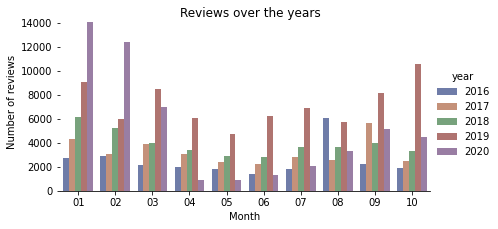

In [37]:
#fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.catplot(
                data=count_concat,
                kind="bar",
                x="month",
                y="counts",
                hue="year",
                ci="sd",
                palette="dark",
                alpha=.6,
                height=3,
                aspect=12/6
)
g.despine(left=True)
g.fig.suptitle('Reviews over the years')
g.set_axis_labels("Month", "Number of reviews")
g.savefig("figures/history_num_reviews.png", dpi=600, transparent=True)

This plot shows the number of reviews per month in last 5 year.  
To be better to compare, only november and december were dropped because this period isn't available for 2020.

Airbnb shows a growth over the years, including beginning of 2020 in janurary and februrary. However, COVID-19's 
phenomenon impacts hardly the services. In Brazil, quarantine started 24/03/2020. During second trimester of 2020, 
reviews numbers in RIO decreased 82% and third trimester 49% both compared with 2019 in same period. The flow is
getting better but it yet is really far from growth before COVID-19.

#### Confirm Airbnb growth pattern over months

Let's check specific months in years that are outliars in this growth behavior.

- Aug/2016

In August of 2016, Brazil hosted Olympic Games. So, it explans a irregular peak in the plot.

- Sep/2017

In [38]:
reviews_2017_sep = reviews_2017[reviews_2017.month == '09']
count_days_2017_sep = utils.count_column(reviews_2017_sep, 'date', 'year', 2017)
count_days_2017_sep['day'] = count_days_2017_sep.date.str.split('-').apply(lambda x: x[2])

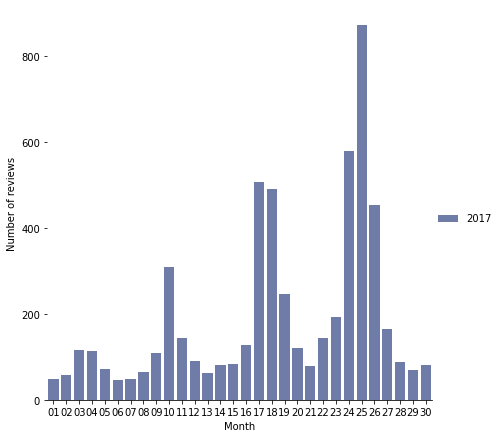

In [39]:
g = sns.catplot(
    data=count_days_2017_sep, kind="bar",
    x="day", y="counts", hue="year",
    ci="sd", palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("Month", "Number of reviews")
g.legend.set_title("")

This plot shows the number of reviews in september 2017.  
The question is why the number of reviews are too high in this period.

During 15, 16, 17, 21, 22, 23 and 24 on september in 2017, 
happened Rock in Rio, one of the biggest music festival in the world.  
Apparentely, the lineup in that specif year was really good, because reviews after these days increased heavily.